<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics_february_20/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline


In [2]:
import scipy.stats as sts

1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
url = "hr.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
satisfaction_level = df['satisfaction_level']
print("Среднее: ", statistics.mean(satisfaction_level))
      

Среднее:  0.6128335222348157


In [9]:
print('Медиана: ', statistics.median(satisfaction_level))

Медиана:  0.64


In [41]:
print('Значение моды: ', statistics.mode(satisfaction_level))

Значение моды:  0.1


In [42]:
print('min: ', min(satisfaction_level))

min:  0.09


In [43]:
print('max: ', max(satisfaction_level))

max:  1.0


In [44]:
print("Стандартное отклоне́ние: ", statistics.pstdev(satisfaction_level))

Стандартное отклоне́ние:  0.2486223626820733


In [11]:
print("Дисперсия: ", statistics.pvariance(satisfaction_level))

Дисперсия:  0.061813079225616394


In [10]:
satisfaction_level_range = max(satisfaction_level) - min(satisfaction_level)
print("Размах: ", satisfaction_level_range)

Размах:  0.91


3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.

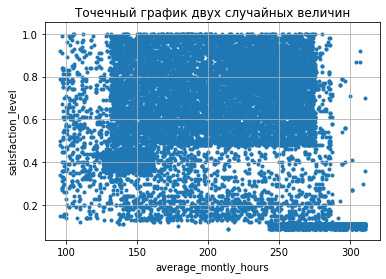

In [12]:
average_montly_hours = df['average_montly_hours']
satisfaction_level = df['satisfaction_level']
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.title('Точечный график двух случайных величин')
plt.grid(True)
plt.scatter(average_montly_hours, satisfaction_level, marker='.')
plt.show()

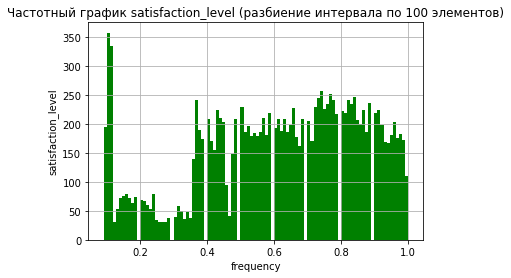

In [13]:
n, bins, patches = plt.hist(df['satisfaction_level'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('satisfaction_level')
plt.title('Частотный график satisfaction_level (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Частотный график выборки y  (или график плотности вероятности).

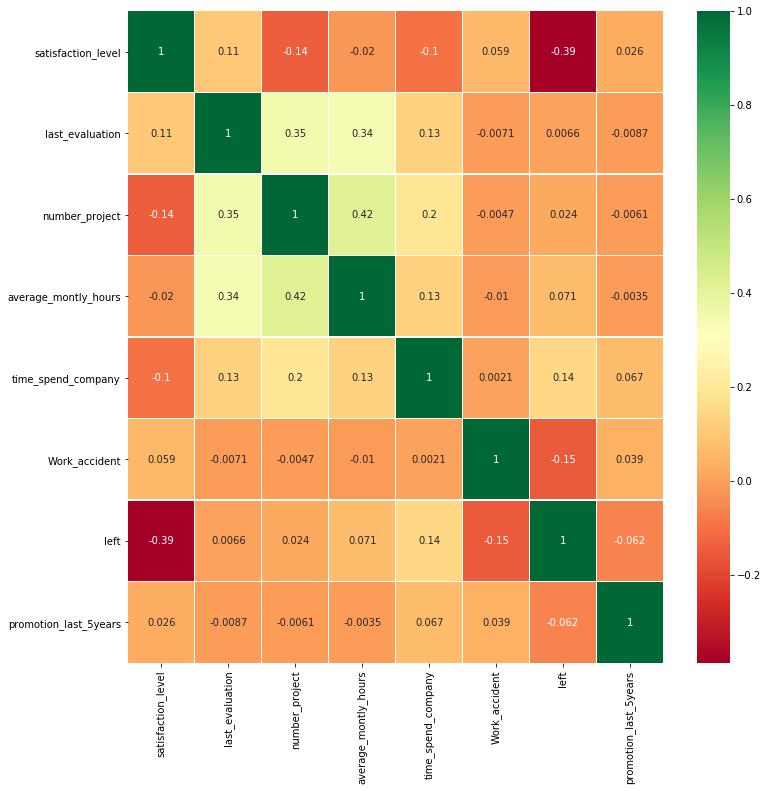

In [14]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig = plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

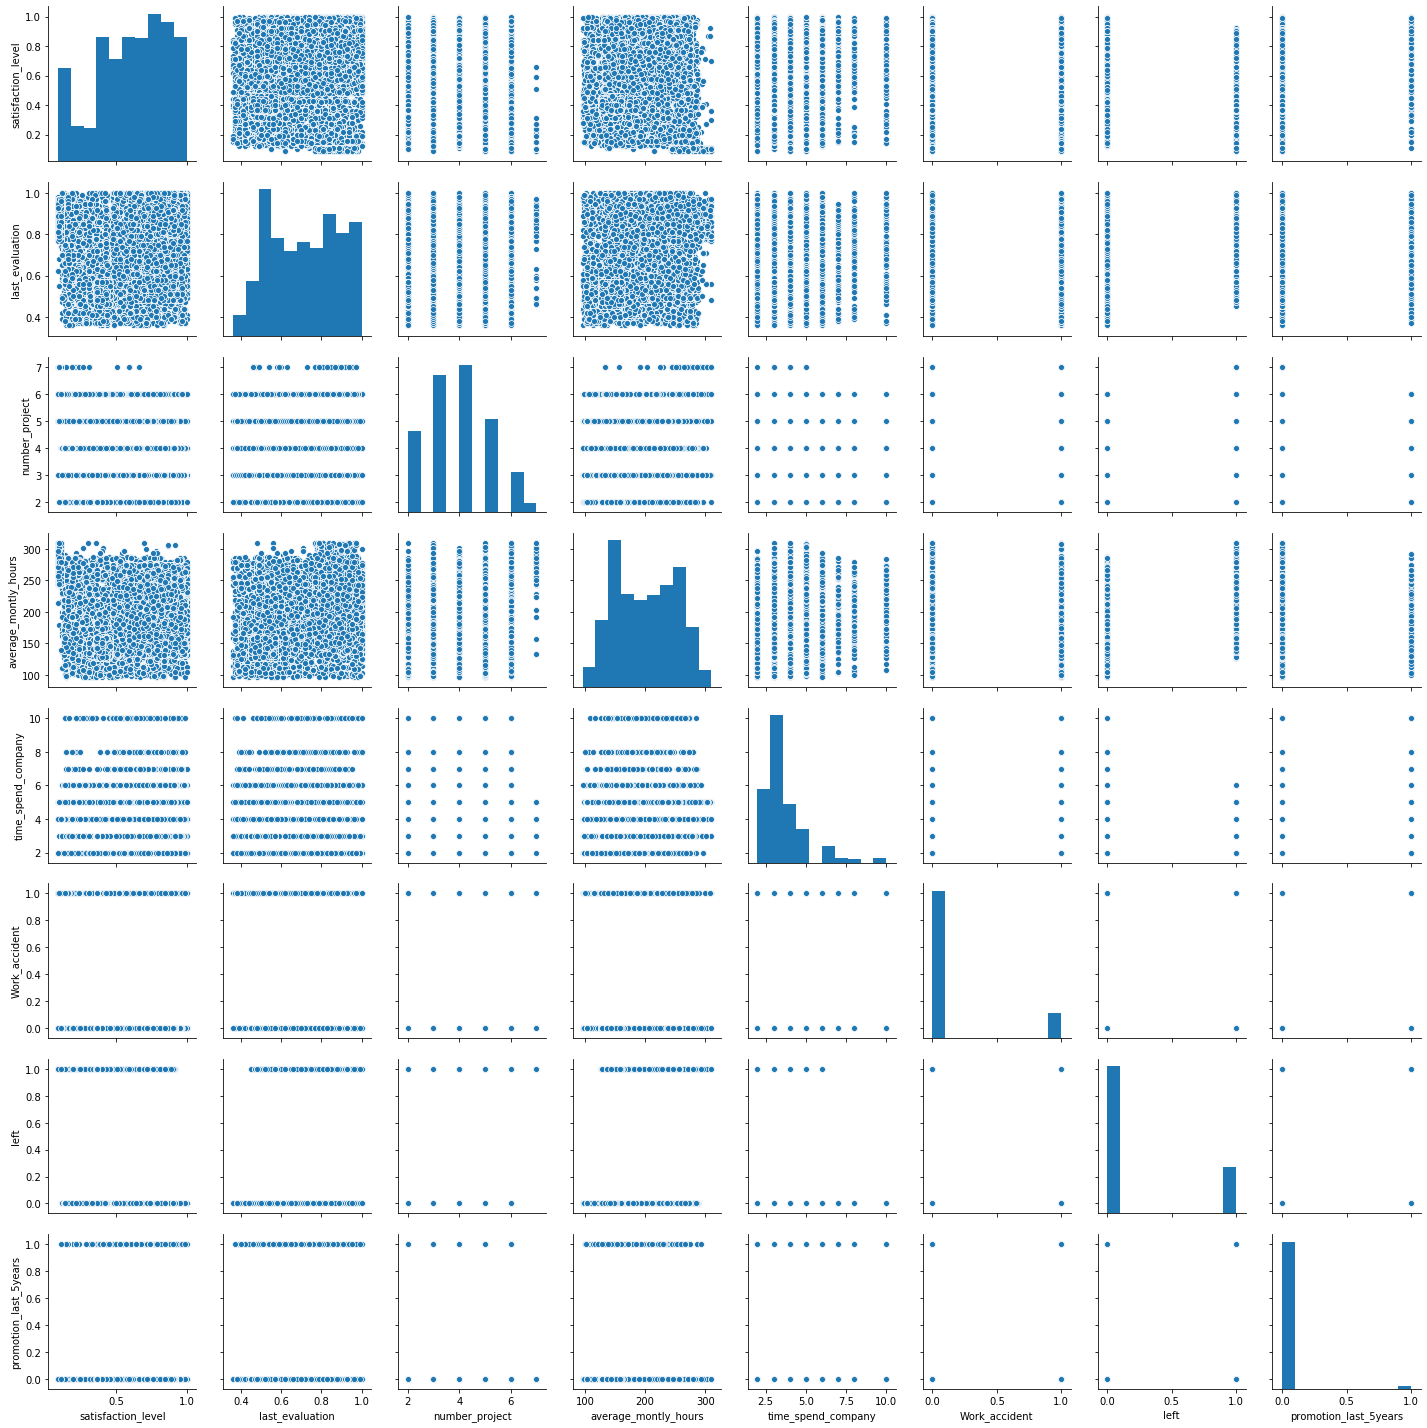

In [10]:
sns.pairplot(df)
plt.show()

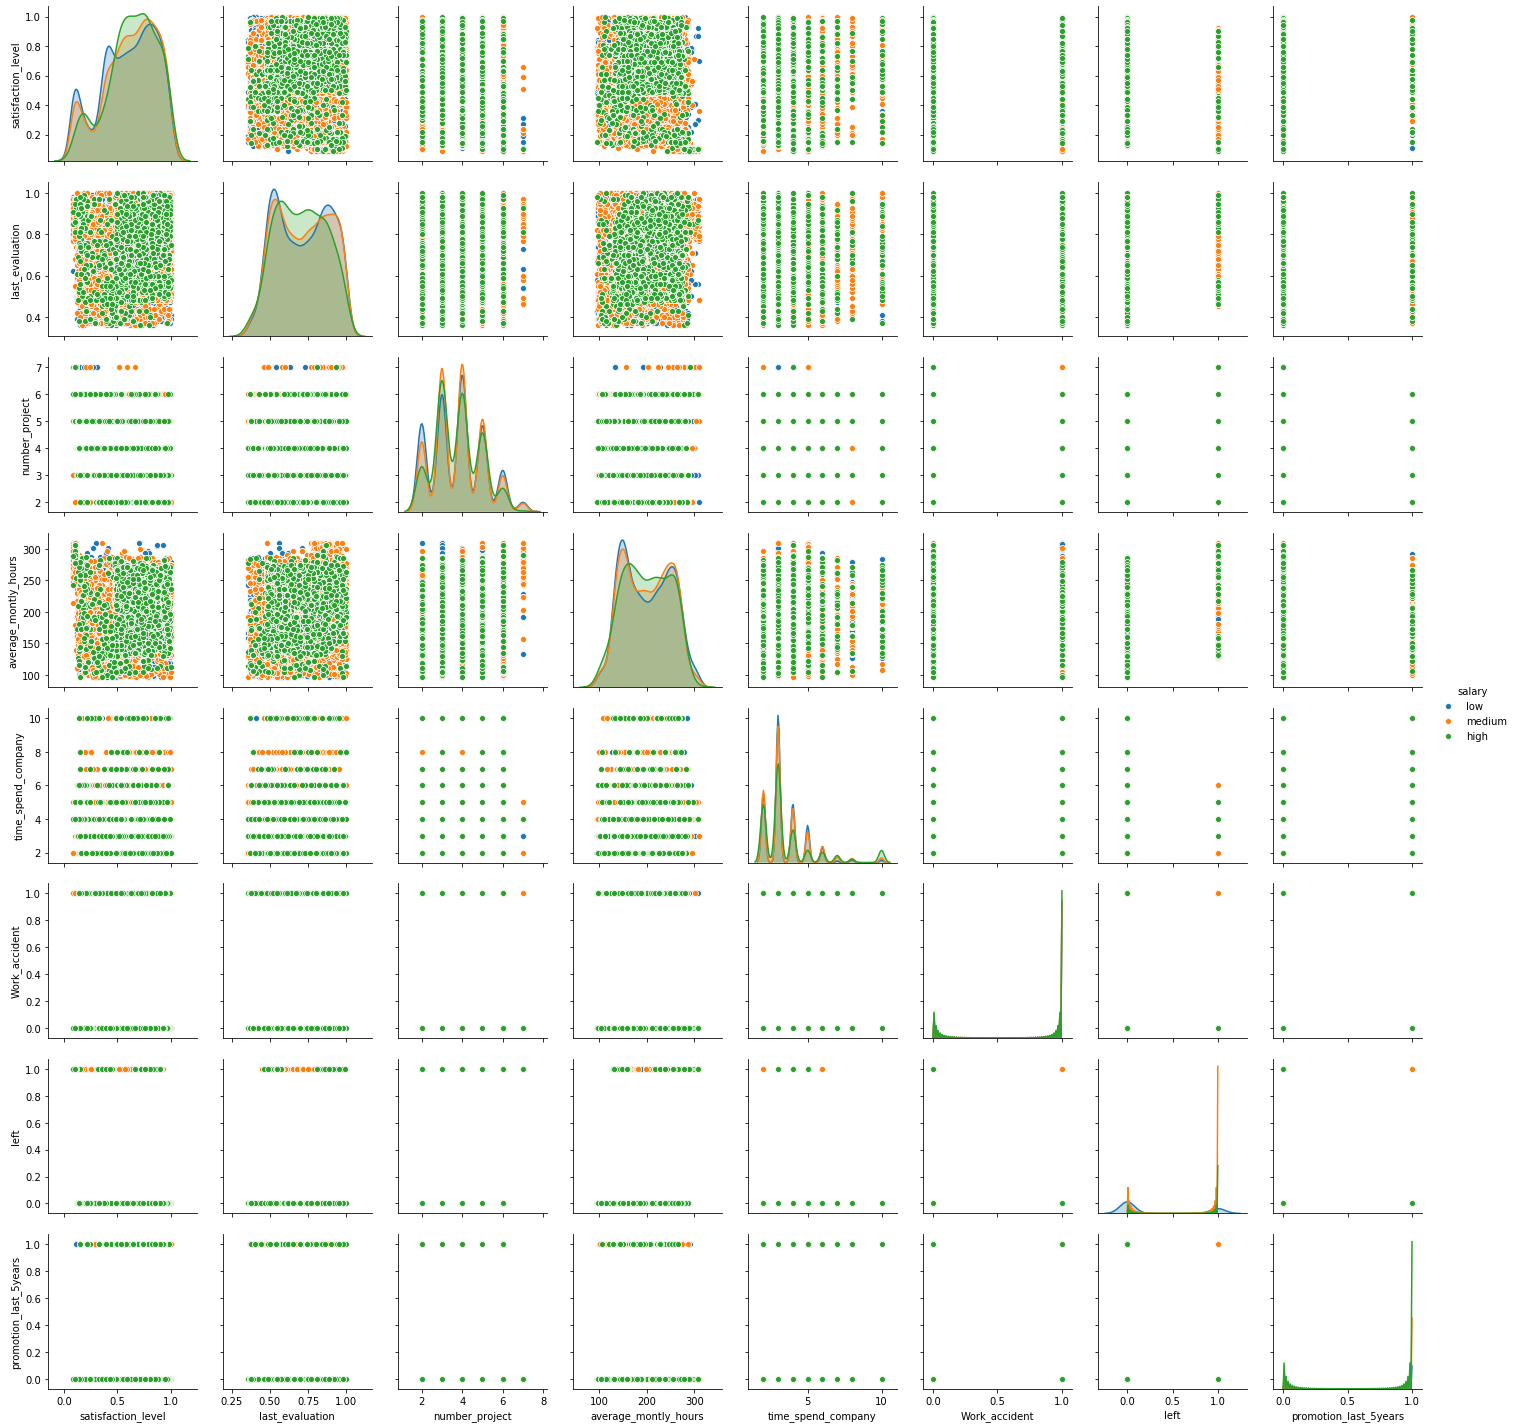

In [15]:
sns.pairplot(df, hue="salary")
plt.show()

#5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [41]:
low_sal_satisfaction = df[df['salary']=='low']['satisfaction_level']

high_sal_satisfaction = df[df['salary']=='high']['satisfaction_level']

t_v, p_v = stats.ttest_ind(low_sal_satisfaction, high_sal_satisfaction)

print(p_v)

if p_v < 0.05:
    print('p-value значительно меньше 0.05  есть зависимость между выборками')
else:
    print('p-value больше 0.05 нет зависимости между выборками')



1.9413281282548522e-06
p-value значительно меньше 0.05  есть зависимость между выборками


In [52]:
satisfaction = df['satisfaction_level']

average_montly_hours = df['average_montly_hours']

t_v, p_v = stats.ttest_ind(satisfaction, average_montly_hours)

if p_v < 0.05:
    print('p-value значительно меньше 0.05  есть зависимость между выборками')
else:
    print('p-value больше 0.05 нет зависимости между выборками')

p-value значительно меньше 0.05  есть зависимость между выборками


6.Рассчитать сколько работников работает в каждом департаменте.

In [11]:
df.groupby('sales').count()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


# Показать распределение сотрудников по зарплатам.

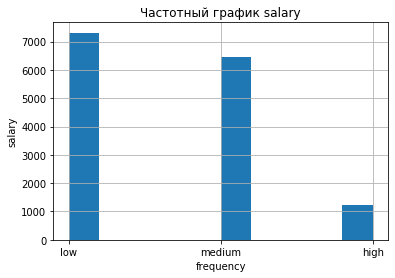

In [18]:
plt.hist(df['salary'])

plt.xlabel('frequency')
plt.ylabel('salary')
plt.title('Частотный график salary')
plt.grid(True)
plt.show()

Показать распределение сотрудников по зарплатам совместно с департаментами.

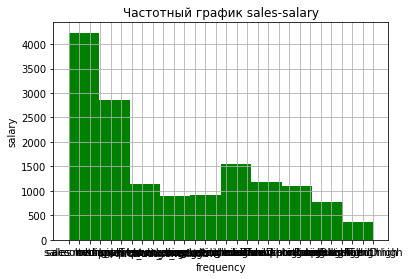

In [35]:
plt.hist(df['sales']+' '+df['salary'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('salary')
plt.title('Частотный график sales-salary')
plt.grid(True)
plt.show()

Сколько сотрудников покинули компанию.

In [42]:
u_left = df[df['left']==1]
u_left['left'].count()

3571

#Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [52]:
u_left.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:

s_ok = df[df['left']==0]['time_spend_company']

s_left = df[df['left']==1]['time_spend_company']

s, p_v = stats.ttest_ind(s_ok, s_left)

if p_v < 0.05:
    print('Есть зависимость time_spend_company')
else:
    print('Нет зависимости time_spend_company')


s_ok = df[df['left']==0]['number_project']

s_left = df[df['left']==1]['number_project']

s, p_v = stats.ttest_ind(s_ok, s_left)

if p_v < 0.05:
    print('Есть зависимость number_project')
else:
    print('Нет зависимости number_project')


s_ok = df[df['left']==0]['last_evaluation']

s_left = df[df['left']==1]['last_evaluation']

s, p_v = stats.ttest_ind(s_ok, s_left)

if p_v < 0.05:
    print('Есть зависимость last_evaluation')
else:
    print('Нет зависимости last_evaluation')


Есть зависимость time_spend_company
Есть зависимость number_project
Нет зависимости last_evaluation


Есть связь показателей сколько времени сотрудники провели в компании и покинули ее. Вероятно это может быть связано с двумя факторами:
1. Возможно те, кто проработал чуть не смогли вписаться в команду или проникнуться идеями и уходят 
2. Наоборот фактор выгорания и люди, которые много провели времени в компании как правило уходят

В пермо варианте можно сделать вывод о плохой системе адаптации в компании или о подборе новых сотрудников не подходящих для команды 
Второй фактор говорит о необходимости развивать возможности карьерного и проф рост, выявить интересы сотрудинков для их более длительной работы.
Требует исследования фактор отдельно, много ли увольняется тех кто чуть работает и много ли тех кто оч долго - какое соотношение

Второй фактор - зависимость показателей от количества проектов.
Варианта 2 
1. уходить могут те кто перегружены проектами
2. Наоборот кому проекты не достаются 
В обоих случаях нужны корректировки
Требуется дополнительный анализ на каком именно эффекте больше уходят Когда мало проектов или когда много